# S2 What makes a neuron spike?
## - Generation of Action Potentials

##### Developed in the Neural Engineering Laboratory at the University of Missouri by Ziao Chen. Notes added by Matt Stroud

This notebook displays an interactive plot of a spiking neuron. If you would like to learn more of the fundamentals of action potentials, scroll to the bottom of this notebook to view a video.

Begin with installing NEURON (any package you use must first be installed)
 

In [2]:
!pip install neuron

     |████████████████████████████████| 8.7MB 4.5MB/s 


If this cell doesn't work, go to the "Runtime" tab -> "Change runtime type". A dialogue box will appear. Change python 2 to python 3.

# You need to connect files to this notebook in order to run the simulation.

We have outlined 2 methods for doing so (You only need to do 1 of the methods, so don't worry about the other one). Method #1 is easier if you have all files associated with this notebook (they should be in the same folder as this notebook on your local computer). 

## Method 1 (recommended)

If you uploaded this file from your local computer to google colab, you are already halfway done.

1) Go to the left side panel and click on the folder icon. 3 buttons should appear under the "Files" title. 

2) Click on the first of these 3 buttons (looks like a page with an up arrow on it). This will generate a dialogue box that lets you upload files to this notebook.

3) Navigate to your S2_ActionPotential folder and select all files with the .mod file extension name. Click open.

That's it. If you see the .mod files appear under the "Files" side panel you are finished. 

If you completed steps 1-3 and the files did not show, you can click the second of the three buttons under the "Files" title to refresh the notebook's files(folder icon with refresh symbol). 

### Skip the next 3 code cells below if you uploaded files directly without using your google drive folder. 

## Method 2 (Connecting to Google Drive)

If you are connecting this notebook to your google drive to access files from there, this cell can help you do that. (skip if you uploaded files directly)

1) First, run the cell below. The cell will output a link(blue) and a text box. Click on the link, and it will ask you to sign in to your google drive. Once you do this, a long code will appear. Copy this code and paste it in the text box beneath this cell. Hit enter and the cell will output "Mounted at /content/drive" 

2) If you completed the last step, go to the left side panel. There you will see a folder icon...click on this. You should see a folder named "drive". You can expand this folder to find every file in your google drive.

If you completed steps 1-2 and the "drive" folder did not show, you can click the second of the three buttons under the "Files" title to refresh the notebook's files(folder icon with refresh symbol).

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Now you need to tell the notebook which files you will be accessing in your drive.

You can check what the notebook sees by running the following cell.

In [ ]:
%ls

k.mod  leak.mod  na.mod  sample_data/


To get the notebook to see the right files, you need to modify the cell below (only what's in single quotation marks). Expand the drive folder in the left "Files" side panel (folder icon) and find the "S2_ActionPotential" Folder. Hover over this folder and select the 3 dots to the right of the folder name. Click "Copy Path" and paste it in the cell below in the single quotation marks. Run the cell.



In [5]:
%cd '/content/drive/MyDrive/MIZNEURO-COLAB/S2_ActionPotential'

/content/drive/MyDrive/MIZNEURO-COLAB/S2_ActionPotential


If the output matches what you put in the single quotation marks, you are good to go.

# Setting up and Running the Simulation

#### Before running the simulation, you need to compile the mod files only once for the first time. In Linux or MacOS, run the cell below to compile. In Windows, you need to run 'mknrndll' instead and select current folder to compile. 

In [6]:
import os
print(os.system('nrnivmodl')) # compile modfiles. Return 0 for success, 1 for failure.

0


If the cell above output a 0, Great! You should be able to run the cells below to see an interactive simulation of a spiking neuron!

### Run the codes below and answer the 10 questions at the end.

In [7]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to Hide/Show the code."></form>''')

In [8]:
from IPython.display import Javascript
Javascript('IPython.notebook.execute_cells_below()')

<IPython.core.display.Javascript object>

In [9]:
import matplotlib.pyplot as plt
from neuron import h
h.load_file('stdrun.hoc')

# Simulation parameters
h.dt = 0.025 # time step (resolution) of the simulation in ms
h.v_init= -60 # initial membrane potential in mV

# Cell geometry and biophysics
soma = h.Section(name='soma')
soma.L = 500 # soma length um
soma.diam = 500 # soma diameter um
soma.cm = 1 # membrane capacitance uF/cm2
soma.Ra = 30 # ohm-cm

soma.insert('leak') # Leak channel
soma.glbar_leak = 0.0003 # S/cm2
soma.el_leak = -60 # mV
soma.insert('na') # Sodium channel
gnabar = 0.12 # S/cm2
soma.nao = 79.8 # extracellular Na concentration
soma.insert('k') # Potassium channel
gkbar = 0.036 # S/cm2
soma.ki = 69.35 # intracellular K concentration

# Current clamp. Inject current in the middle of the soma
ccl = h.IClamp(soma(0.5))
# Voltage clamp
vcl = h.VClamp(soma(0.5))
vcldur = [[0,0,0],[10,20,1e9]]
for i in range(3): vcl.amp[i] = -60

# Define vectors for recording variables
t_vec = h.Vector(); v_vec = h.Vector()
gna_vec = h.Vector(); gk_vec = h.Vector()
il_vec = h.Vector(); ina_vec = h.Vector(); ik_vec = h.Vector()
m_vec = h.Vector(); h_vec = h.Vector(); n_vec = h.Vector()
ccl_vec = h.Vector(); vcl_vec = h.Vector()

# Record the variables
t_vec.record(h._ref_t); v_vec.record(soma(0.5)._ref_v)
gna_vec.record(soma(0.5)._ref_gna_na); gk_vec.record(soma(0.5)._ref_gk_k)
il_vec.record(soma(0.5)._ref_il_leak); ina_vec.record(soma(0.5)._ref_ina); ik_vec.record(soma(0.5)._ref_ik)
m_vec.record(soma(0.5)._ref_m_na); h_vec.record(soma(0.5)._ref_h_na); n_vec.record(soma(0.5)._ref_n_k)
ccl_vec.record(ccl._ref_i); vcl_vec.record(vcl._ref_i)

def plot_variables(clamp):
    plt.figure(figsize=(13,20))
    # Membrane potential
    plt.subplot(5,1,1)
    plt.plot(t_vec, v_vec,'b')
    plt.xlim(0,h.tstop); plt.ylim(-100,70)
    plt.ylabel('mV'); plt.legend(['Vm'],loc=1)
    # Channel conductances
    plt.subplot(5,1,2)
    plt.plot(t_vec,gna_vec,'r')
    plt.plot(t_vec,gk_vec,'b')
    plt.xlim(0,h.tstop)
    plt.ylabel('siemens/cm2'); plt.legend(['gna','gk'],loc=1)
    # Channel currents
    plt.subplot(5,1,3)
    plt.plot(t_vec,ina_vec ,'r')
    plt.plot(t_vec,ik_vec ,'b')
    plt.plot(t_vec,il_vec ,'g')
    plt.xlim(0,h.tstop)
    plt.ylabel('mA/cm2'); plt.legend(['ina','ik','ileak'],loc=1)
    # Channel activation and inactivation variables
    plt.subplot(5,1,4)
    plt.plot(t_vec,m_vec ,'r')
    plt.plot(t_vec,h_vec ,'orange')
    plt.plot(t_vec,n_vec ,'b')
    plt.xlim(0,h.tstop); plt.ylim(-0.05,1.05)
    plt.ylabel('probability'); plt.legend(['m','h','n'],loc=1)
    # Current clamp or Voltage clamp
    plt.subplot(5,1,5)
    if clamp=='VClamp':
        plt.plot(t_vec,vcl_vec ,'r')
        plt.legend(['VClamp_i'],loc=1)
    else:
        plt.plot(t_vec,ccl_vec ,'r')
        plt.legend(['IClamp_i'],loc=1)
    plt.xlim(0,h.tstop)
    plt.xlabel('time (ms)'); plt.ylabel('nA')
    plt.show()

def activemodel(tstop,block_na,block_k,clamp,ccl_amp,ccl_dur,ccl_delay,vcl_amp,fig):
    if block_na: soma.gnabar_na = 0
    else: soma.gnabar_na = gnabar
    if block_k: soma.gkbar_k = 0
    else: soma.gkbar_k = gkbar
    
    if clamp=='VClamp':
        ccl.amp = 0; vcl.amp[1] = vcl_amp
        for i in range(3): vcl.dur[i] = vcldur[1][i]
    else:
        for i in range(3): vcl.dur[i] = vcldur[0][i]
        ccl.amp = ccl_amp; ccl.dur = ccl_dur; ccl.delay = ccl_delay
    
    h.tstop = tstop
    h.run()
    plt.close('all')
    plot_variables(clamp)

In [10]:
import ipywidgets as widgets
from ipywidgets import interactive_output,HBox,VBox,Label,Layout
from IPython.display import display
%matplotlib inline

# default setting
tstop = 100 # how long to run the simulation in ms
ccl_amp = 100 # amplitude in nA
ccl_dur = 40.0 # duration in ms
ccl_delay = 5.0 # delay in ms
vcl_amp = -10 # voltage clamp amplitude in mV
clamp = 'IClamp'

wide = Layout(width='30%')
w_reset = widgets.Button(description='Reset',icon='history',button_style='primary')
w_fig = widgets.ToggleButton(value=False,description='Interactive plot',icon='window-restore',button_style='success')
w_tstop = widgets.BoundedFloatText(value=tstop,min=1,max=1e4,description='Tstop (ms)')
w_na = widgets.ToggleButton(value=False,description='Block Na Channel',icon='ban',button_style='danger',layout=wide)
w_k = widgets.ToggleButton(value=False,description='Block K Channel',icon='ban',button_style='warning',layout=wide)
w_clamp = widgets.ToggleButtons(value=clamp,options=['IClamp','VClamp'],button_style='info')
w_ccl_amp = widgets.FloatText(value=ccl_amp)
w_ccl_dur = widgets.FloatText(value=ccl_dur)
w_ccl_delay = widgets.FloatText(value=ccl_delay)
w_vcl_amp = widgets.FloatText(value=vcl_amp,disabled=True)

def reset_default(*args):
    w_tstop.value = tstop; w_clamp.value = clamp
    w_na.value = False; w_k.value = False
    w_ccl_amp.value = ccl_amp; w_ccl_dur.value = ccl_dur
    w_ccl_delay.value = ccl_delay; w_vcl_amp.value = vcl_amp
w_reset.on_click(reset_default)

def interactive_fig(*arg):
    if w_fig.value:
        w_fig.icon = 'window-maximize'; w_fig.description = 'Inline plot'
        %matplotlib notebook
        %matplotlib notebook
    else:
        w_fig.icon = 'window-restore'; w_fig.description = 'Interactive plot'
        %matplotlib inline
w_fig.observe(interactive_fig,'value')

def toggle_na(*args):
    if w_na.value:
        w_na.icon = 'play-circle'; w_na.description='Unblock Na Channel'
    else:
        w_na.icon = 'ban'; w_na.description='Block Na Channel'
w_na.observe(toggle_na,'value')

def toggle_k(*args):
    if w_k.value:
        w_k.icon = 'play-circle'; w_k.description='Unblock K Channel'
    else:
        w_k.icon = 'ban'; w_k.description='Block K Channel'
w_k.observe(toggle_k,'value')

def toggle_clamp(*args):
    if w_clamp.value=='VClamp':
        w_ccl_amp.disabled = True; w_ccl_dur.disabled = True
        w_ccl_delay.disabled = True; w_vcl_amp.disabled = False
    else:
        w_ccl_amp.disabled = False; w_ccl_dur.disabled = False
        w_ccl_delay.disabled = False; w_vcl_amp.disabled = True
w_clamp.observe(toggle_clamp,'value')

around = Layout(justify_content='space-around')
labels = ['Toggle IClamp/VClamp:','Current Clamp','Voltage Clamp',
          'Amplitude (nA):','Duration (ms):','Delay (ms):','Amplitude (mV):']
Labels = [Label(L) for L in labels]

ui = VBox([ HBox([w_reset,w_fig]), w_tstop, HBox([w_na,w_k]), HBox([Labels[0],w_clamp]), HBox(Labels[1:3],layout=around),
           HBox([ VBox(Labels[3:6]),VBox([w_ccl_amp,w_ccl_dur,w_ccl_delay]),Labels[6],w_vcl_amp ],layout=around) ])
out = interactive_output(activemodel,{'tstop':w_tstop,'block_na':w_na,'block_k':w_k,'clamp':w_clamp,
                'ccl_amp':w_ccl_amp,'ccl_dur':w_ccl_dur,'ccl_delay':w_ccl_delay,'vcl_amp':w_vcl_amp,'fig':w_fig})

display(ui,out)

Output()

### Questions:
1. Reset all fields to their initial values. Click on the __Block Na Channel__ button to run a simulation with the Na channel blocked (this simulates the action of tetrodoxin, a neurotoxin derived from the puffer fish. Actually this is how many neurotoxins work). What do you think will happen? Note below.  
<br>
2. Reset all fields to their initial values and unblock the Na channel. Click on __Block K Channel__ to block the K channel. What will happen? Note below.  
<br>
3. Using the state plots (time history of activation and inactivation functions), explain the generation of an action potential.  
<br>
4. Increase the magnitude of the injection current and describe what happens to the firing frequency.  
<br>
5. Perform a voltage clamp experiment to estimate the sodium reversal potential. Explain the logic of how you obtained it (including equation) and attach the relevant plots.  
<br>
6. Determine approximate values for mNa, hNa and mKd for the following cases:
  - at the rest state (inject = 0)
  - at the peak of the action potential (with I_inject = 100 nA)
  - at the lowest point of the action potential (of the down swing with I_inject = 100 nA)  
<br>
7. Determine the values of all currents at equilibrium (by hand) and make sure they sum up to zero when inject = 0. The parameters used in the model are as follows:  
  - Maximal Conductances for the ion channels in S/cm<sup>2</sup>: gbarNa= 0.12; gbarK= 0.036; gbarleak= 0.0003.
  - Other parameters: Asoma = 0.007854 cm<sup>2</sup>; Csoma = 1&mu;F/cm<sup>2</sup>.
  - Get other parameters and variables from the simulation. Run the model, and then type ```print(soma.ena, soma.ek, soma.el_leak, soma.m_na, soma.h_na, soma.n_k, soma.v)``` in a new line to get the values.  
<br>
8. By counting the number of spikes generated in a 100 msec window, construct a plot of firing frequency vs. injected current, starting at the rheobase current (minimum injected current that elicits spiking) and working up to a value of about 10 times rheobase. (Suggested settings: base current = 0 nA; onset delay = 50 msec; pulse width 100 msec; simulation time, tstop = 200 msec.) How much does a 10-fold increase in injected current increase the firing rate? What happens if you increase the injected current to 100 times rheobase?  
<br>
9. In problem 3 we saw that single action potentials can be elicited by small sustained levels of current injection. Single action potentials can also be elicited by transient pulses of current injection, even when the duration of the pulse is shorter than the duration of the action potential. As the length of the pulse decreases, however, the amplitude necessary to elicit an action potential increases. Generate a plot of single spike threshold current vs. pulse duration for pulse widths between 0.1 and 2.0 msec. Is there a simple relationship between pulse width and threshold current?  
<br>
10. All of the injection pulses in the previous current clamp problems have been depolarizing. In this problem you will look at the effect of hyperpolarizing current pulses. Set the pulse amplitude to -100 nA and set the pulse duration to 5 msec. What happens? What is the threshold, in terms of current magnitude and pulse duration, for eliciting this so-called anode break excitation? What mechanisms in the model are responsible for this behavior? (Hint: look at the time course of the state variables m, n and h.)

### Extra Material

Here is a Crash Course video on action potentials if you are interested. Full screen is not available in the notebook, so you can open the video in a different tab by clicking "YouTube" at the bottom of the video panel if you would like.

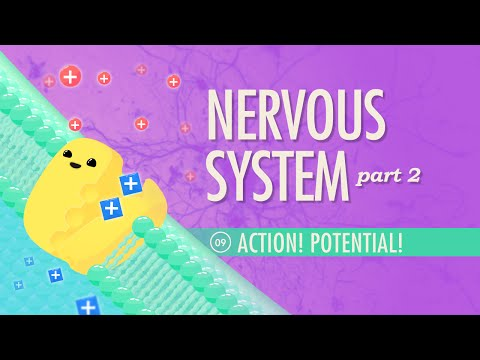

In [14]:
from IPython.display import HTML,YouTubeVideo
YouTubeVideo('OZG8M_ldA1M')